# Exchange Rate vs. Inflation Analysis

This script reads in CSV files containing exchange rate and inflation data, generates line plots to visualize these values over time for each currency/country in out dataset.  A PNG file of each chart is save in the Output directory.

In [1]:
# set environment
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import warnings

# pull in constants from config file
from config import xchg_filename
from config import infl_filename
from config import base_country
from config import countries

# turn off warning notifications
warnings.filterwarnings("ignore")


# define years to plot
years = ["2014", "2015", "2016", "2017", "2018", "2019"]

In [2]:
# get currency code we compared all rates to
base_currency = base_country["currency_code"]

In [3]:
# read in exchange rate data and display the dataframe
exchange_data = pd.read_csv(xchg_filename)
exchange_data.head()

,Country,Currency Code,Currency,Year,Close Rate
0,Australia,AUD,Australian Dollar,2014,0.8165
1,Australia,AUD,Australian Dollar,2015,0.7289
2,Australia,AUD,Australian Dollar,2016,0.7201
3,Australia,AUD,Australian Dollar,2017,0.7808
4,Australia,AUD,Australian Dollar,2018,0.7048


In [4]:
# read in exchange rate data, drop any rows with null data,
# and display the dataframe
inflation_data = pd.read_csv(infl_filename)
inflation_data.dropna(how="any", inplace=True)
inflation_data

,Unnamed: 0,Country,Currency Code,Currency,2019,2018,2017,2016,2015,2014
0,0,Belarus,BYN,Belarusian Ruble,0.88,5.64,4.59,10.58,11.97,16.22
1,1,Brazil,BRL,Brazilian Real,0.32,3.75,2.95,6.29,10.67,6.41
2,2,Canada,CAD,Canadian Dollar,0.00,1.99,1.87,1.50,1.61,1.47
3,3,European Union,EUR,Euro,1.57,1.63,1.64,1.14,0.18,-0.08
8,8,India,INR,Indian Rupee,0.00,5.24,4.00,2.23,6.32,5.86
9,9,Japan,JPY,Japanese Yen,0.79,0.30,1.10,0.30,0.10,2.36
10,10,Kazakhstan,KZT,Kazakhstani Tenge,0.50,5.43,7.22,8.29,13.53,7.54
11,11,Mexico,MXN,Mexican Peso,0.00,1.66,6.77,3.36,2.13,4.08
12,12,Russia,RUB,Russian Ruble,3.05,4.27,2.52,5.38,12.91,11.36
14,14,Turkey,TRY,Turkish Lira,1.06,20.30,11.92,8.53,8.81,8.17


In [5]:
# pull a list of unique currency codes from each dataset
exch_curr_codes = exchange_data["Currency Code"].unique()
infl_curr_codes = inflation_data["Currency Code"].unique()

In [6]:
# remove any currency code data that is in the Exchange Rate dataset,
# but not in the Inflation Rate dataset
for curr_code in exch_curr_codes:
    if curr_code not in infl_curr_codes:
        exchange_data.drop(exchange_data[exchange_data["Currency Code"] == curr_code].index, inplace=True)

# get a cleaned list of currency codes from the Exchange Rate dataset
exch_curr_codes = exchange_data["Currency Code"].unique()

# remove any currency code data that is in the Inflation Rate dataset,
# but not in the Exchange Rate dataset
for curr_code in infl_curr_codes:
    if curr_code not in exch_curr_codes:
        inflation_data.drop(inflation_data[inflation_data["Currency Code"] == curr_code].index, inplace=True)

# both datasets should match now, get a unique list of currency codes
curr_codes = inflation_data["Currency Code"].unique()

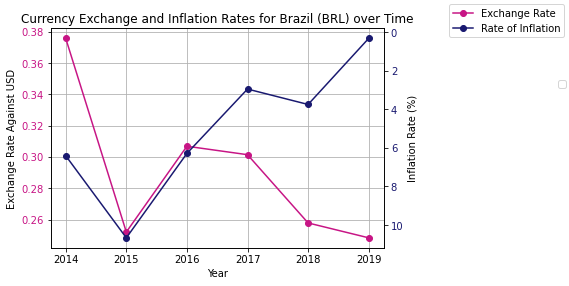

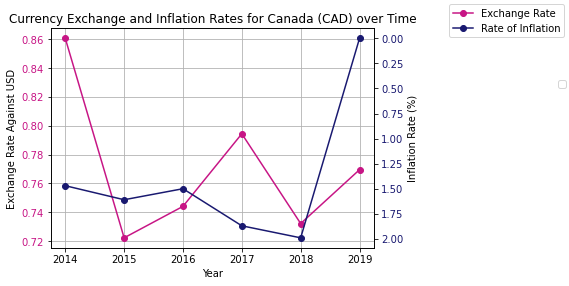

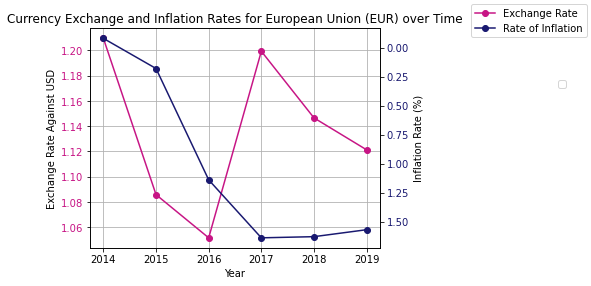

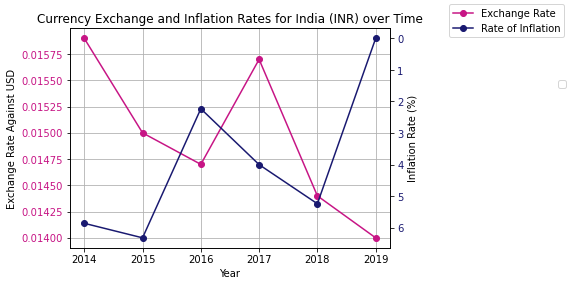

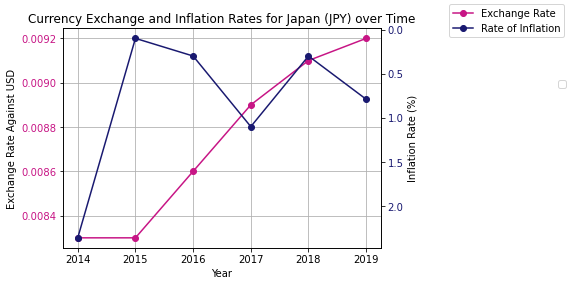

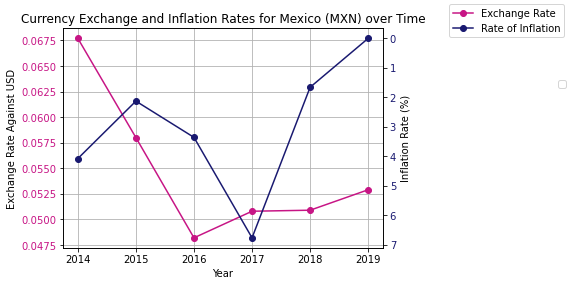

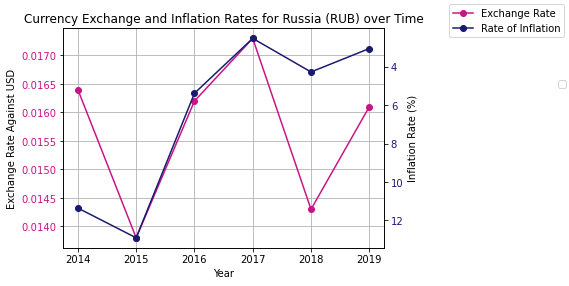

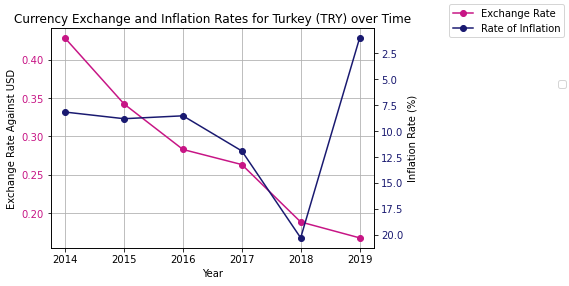

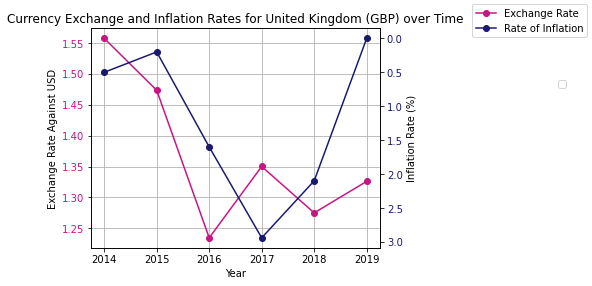

In [7]:
# loop through each unique currency code
for curr_code in curr_codes:
    # pull x and y currency exchange values for chart
    year_data = exchange_data.loc[exchange_data["Currency Code"] == curr_code]["Year"]
    xc_rate_data = exchange_data.loc[exchange_data["Currency Code"] == curr_code]["Close Rate"].astype(float)
    
    # grab the country name from the single instance in the inflation table
    country = inflation_data.loc[inflation_data["Currency Code"] == curr_code]["Country"].values[0]
    
    # tell matplotlib we want different scales on one chart
    fig, exch_line = plt.subplots()
    

    # plot exchange rate data
    exch_line.plot(year_data, xc_rate_data, marker='o', color="mediumvioletred", label="Exchange Rate")
    exch_line.tick_params(axis='y', labelcolor = 'mediumvioletred')

    # instantiate a second y-axis
    infl_line = exch_line.twinx()

    # loop through our dataset years, pull the inflation rate data
    # and append to our list
    inflation_list = []
    for year in years:
        inflation_list.append(inflation_data.loc[inflation_data["Currency Code"] == curr_code][year].values[0])

    # create a temporary dataframe for the current year data
    # and pull it back out in a format matching the exchange rate data
    temp_df = pd.DataFrame({"Year": years, "Rate": inflation_list})
    in_rate_data = temp_df["Rate"].astype(float)
    
 
    # plot inflation data
    infl_line.plot(year_data, in_rate_data, marker='o', color="midnightblue", label="Rate of Inflation" )
    infl_line.tick_params(axis='y', labelcolor='midnightblue')
    infl_line = plt.gca()
    infl_line.set_ylim(infl_line.get_ylim()[::-1])

    # format a title and axis labels for our chart
    exch_line.set_title(f"Currency Exchange and Inflation Rates for {country} ({curr_code}) over Time")
    exch_line.set_xlabel("Year")
    exch_line.set_ylabel(f"Exchange Rate Against {base_currency}")
    infl_line.set_ylabel("Inflation Rate (%)", rotation="vertical")
    
    # create a legend for our chart
    fig.legend(handles=[exch_line, infl_line], bbox_to_anchor=(1.3, 0.7), loc='center', borderaxespad=0)
    fig.legend(loc="best")

    # add a grid for looks
    exch_line.grid()

    # save a copy of the graph
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig(f"Output/XRvsInflLineGraph_{curr_code}.png")
    
    # Show the chart
    plt.show()